In [1]:
import random, numpy as np, pandas as pd
from matplotlib import pyplot as plt
import os

In [2]:
%run ../../stochastic_fractal_m.py

In [3]:
alphap = 3
probp = 0.75
slope = 0.78835

expon = 2 * alphap - 1

## Directory

In [4]:
dir_data = "../../data/alpha{}/".format(alphap)
dir_fig = "../../figures/alpha{}/".format(alphap)

##for testing
dir_data = "../../data/temp/alpha{}/".format(alphap)
dir_fig = "../../figures/temp/alpha{}/".format(alphap)


for dir_name in [dir_data, dir_fig]:
    if not os.path.exists(dir_name):
        os.mkdir(dir_name)
        print("directory created")
        pass
    else:
        print("directory exists")
        pass



filename_out_data = dir_data+"Mdf_alpha_{}_p_0_{:2}".format(alphap, int(probp*100))
filename_figure = dir_fig+"conservation_alpha_{}.pdf".format(alphap)
print(filename_out_data)

directory exists
directory exists
../../data/temp/alpha3/Mdf_alpha_3_p_0_75


In [9]:
total_iterationp = 1000*1000
min_iterationp  = 1000*100
iteration_stepp = 1000 * 50
number_of_data_points = (total_iterationp-min_iterationp)//iteration_stepp
# number_of_data_points = 20
print(number_of_data_points)
ensemble_sizep = 1000*50

sf_moment = Moment(alpha=alphap, probability=probp)
sf_moment.log(True)
time_list = np.arange(min_iterationp, total_iterationp+iteration_stepp, iteration_stepp)
time_list = np.linspace(min_iterationp, total_iterationp, number_of_data_points)
Mdf_list = sf_moment.run_ensemble(ensemble_sizep, total_iterationp, min_iterationp, number_of_data_points)
Mdf_avg = np.average(Mdf_list)

18
kwargs  {'alpha': 3, 'probability': 0.75}
Key 'fractal_dim' or 'exponent' not found!
Theoretical value is used
realization  500  . Time spent  570.4956498146057  sec
realization  1000  . Time spent  545.0227680206299  sec
realization  1500  . Time spent  543.5315129756927  sec
realization  2000  . Time spent  546.3296020030975  sec
realization  2500  . Time spent  543.0074374675751  sec
realization  3000  . Time spent  545.8736798763275  sec
realization  3500  . Time spent  544.2352800369263  sec
realization  4000  . Time spent  547.3989417552948  sec
realization  4500  . Time spent  544.921834230423  sec
realization  5000  . Time spent  540.4312748908997  sec
realization  5500  . Time spent  550.1017591953278  sec
realization  6000  . Time spent  549.6244132518768  sec
realization  6500  . Time spent  546.7367203235626  sec


KeyboardInterrupt: 

In [7]:
import json

header = dict()
header['alpha'] = alphap
header['probability'] = probp
header['ensemble_size'] = ensemble_sizep
header['total_iteraion'] = total_iterationp
header['Mdf_avg']= "{:6f}".format(Mdf_avg)
header['cols'] = ["t", "M_df"]

header_str = json.dumps(header)
print(header_str)

np.savetxt(filename_out_data, np.c_[time_list, Mdf_list], header=header_str)

{"alpha": 3, "probability": 0.75, "ensemble_size": 1000, "total_iteraion": 10000, "Mdf_avg": "1.019688", "cols": ["t", "M_df"]}


../../figures/temp/alpha3/conservation_alpha_3.pdf


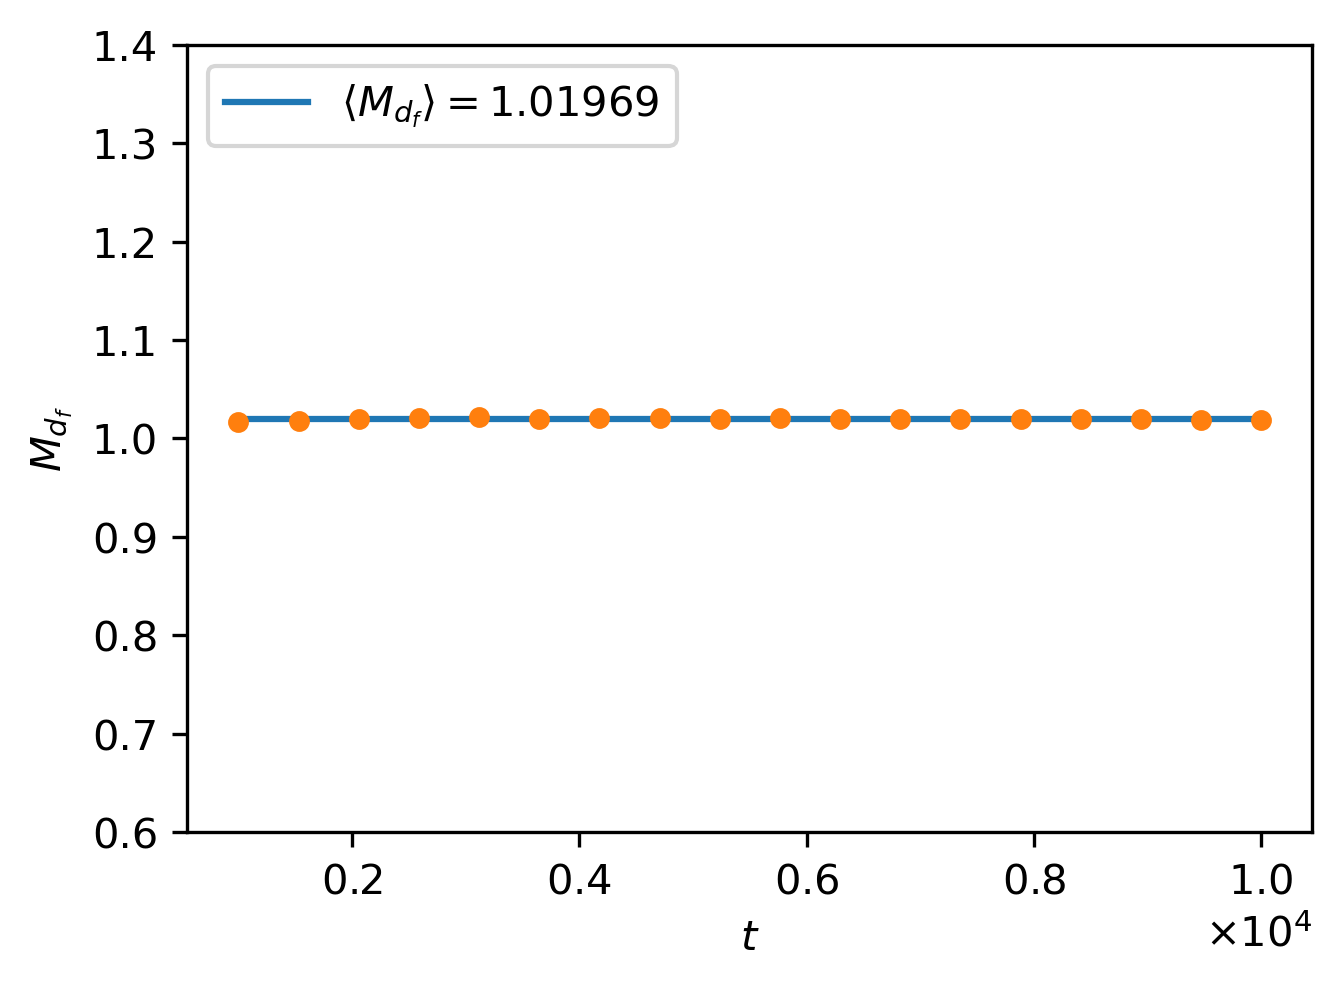

In [8]:
from matplotlib import ticker

fig, axes = plt.subplots(1,1,figsize = (5,3.5),dpi = 300)
plt.plot(time_list, 0*time_list+Mdf_avg, label=r"$\langle M_{d_f}\rangle=$"+"{:.5f}".format(Mdf_avg), color='tab:blue')
plt.plot(time_list, Mdf_list, "o", color='tab:orange', markersize=4)
plt.legend(loc=2)
plt.xlabel(r"$t$")
plt.ylabel(r"$M_{d_f}$")
plt.ylim([0.6, 1.4])
axes.set_position([0.15,0.15,0.75,0.75])

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
axes.xaxis.set_major_formatter(formatter) 

print(filename_figure)
# plt.savefig(filename_figure)